In [7]:
import numpy as np

In [8]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [217]:
N = 101 # 1001
l = 10
xvec, dx = np.linspace(-l, l, N, retstep=True)
print(dx)
print(dx - (xvec[1] - xvec[0]))

0.2
7.216449660063518e-16


In [218]:
# effective grid
# grid scaling
# this determines the density of our Gaussians
# which relates the number of bases we are using
# a Gaussian will cented every gs*dx step
# gs = 10

# this is the grid of center positions for our
# Gaussian basis
# xx = np.arange((N-1)//gs + 1) * dx * gs - l

# gx = dx*gs

# Let's redo the above code so that we can directly
# set the number of bases we use
Ng = 101 # 101
xx, gx = np.linspace(-l, l, Ng, retstep=True)

# where gx = gs*dx
gs = gx/dx

print(gs)
print(xx.shape)
print(xx)

1.0
(101,)
[-10.   -9.8  -9.6  -9.4  -9.2  -9.   -8.8  -8.6  -8.4  -8.2  -8.   -7.8
  -7.6  -7.4  -7.2  -7.   -6.8  -6.6  -6.4  -6.2  -6.   -5.8  -5.6  -5.4
  -5.2  -5.   -4.8  -4.6  -4.4  -4.2  -4.   -3.8  -3.6  -3.4  -3.2  -3.
  -2.8  -2.6  -2.4  -2.2  -2.   -1.8  -1.6  -1.4  -1.2  -1.   -0.8  -0.6
  -0.4  -0.2   0.    0.2   0.4   0.6   0.8   1.    1.2   1.4   1.6   1.8
   2.    2.2   2.4   2.6   2.8   3.    3.2   3.4   3.6   3.8   4.    4.2
   4.4   4.6   4.8   5.    5.2   5.4   5.6   5.8   6.    6.2   6.4   6.6
   6.8   7.    7.2   7.4   7.6   7.8   8.    8.2   8.4   8.6   8.8   9.
   9.2   9.4   9.6   9.8  10. ]


0.043280851226668915


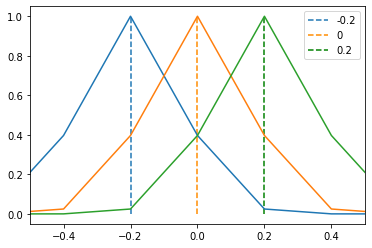

In [219]:
# for plotting
def gauss(x, j):
    return np.exp(-(x - j*gx)**2 / sigma)

# first attempt at finding the optimal amount of overlap
# by hand
# sigma = dx*2

# this should insure that not matter the number of bases
# we will have about the same overlap
sigma = 6 * gx**2 / (8 * np.log(2))
print(sigma)



plt.plot(xvec, gauss(xvec,-1))
plt.vlines(-1*gx, ymin=0, ymax=1, label=-1*gx, linestyles='dashed')
plt.plot(xvec, gauss(xvec,0))
plt.vlines(0, ymin=0, ymax=1, label=0, color='darkorange', linestyles='dashed')
plt.plot(xvec, gauss(xvec,1))
plt.vlines(gx, ymin=0, ymax=1, label=gx, color='green', linestyles='dashed')
plt.xlim([-0.5,0.5])
plt.legend()
plt.show()

In [220]:
# We want a matrix which is constructed by evaluating
# each of the shifted Gaussians at all of the spacial
# grid points
# Here we have one Gaussian centered at each spacial
# grid point
# gmat = np.exp(-(np.expand_dims(xx,0) - np.expand_dims(xx,1))**2 / sigma)
# Because of broadcasting we only need to expand one of the arrays
# so that the dimension is (#, 1)
gmat = np.exp(-(xx - np.expand_dims(xx,1))**2 / sigma)
print(gmat.shape)
np.linalg.cond(gmat)

(101, 101)


7.208835051018818

In [221]:
gmatplot = np.exp(-(np.expand_dims(xx,0) - np.expand_dims(xvec,1))**2 / sigma)
print(gmatplot.shape)

(101, 101)


In [222]:
def myfunc(x):
    out = (x < -3)*(x+3)**3/350 + ((x >= -3) & (x < 6))*(np.exp(-x - 3) - 1) + (x >= 6)*(np.exp(-9) - 1 + (x-6)**2/14)
    # out = 2*np.cos(x) + np.sin(5*x)
    return out

In [223]:
coefs = np.linalg.inv(gmat) @ myfunc(xx)

In [224]:
coefs

array([-0.8220431 , -0.36700478, -0.49253515, -0.38663122, -0.37620823,
       -0.33112635, -0.30294645, -0.2711015 , -0.24364972, -0.21728929,
       -0.19322664, -0.1708791 , -0.15037401, -0.13155693, -0.11438525,
       -0.09877199, -0.08464776, -0.0719362 , -0.06056373, -0.05045559,
       -0.04153772, -0.0337352 , -0.02697486, -0.02117935, -0.01628175,
       -0.01218889, -0.0088737 , -0.00614263, -0.00422156, -0.00227951,
       -0.00214859,  0.00104958, -0.00471521,  0.01112153, -0.02801171,
        0.06815568, -0.13360821, -0.17052891, -0.2527467 , -0.29936069,
       -0.34574415, -0.38045768, -0.41017327, -0.43398859, -0.45369081,
       -0.46974071, -0.48291337, -0.49368548, -0.50251   , -0.5097329 ,
       -0.51564731, -0.5204893 , -0.52445371, -0.52769945, -0.53035685,
       -0.53253254, -0.53431385, -0.53577226, -0.5369663 , -0.5379439 ,
       -0.5387443 , -0.5393996 , -0.53993612, -0.54037539, -0.54073503,
       -0.54102947, -0.54127055, -0.54146792, -0.54162953, -0.54

4.6290860999080515e-15


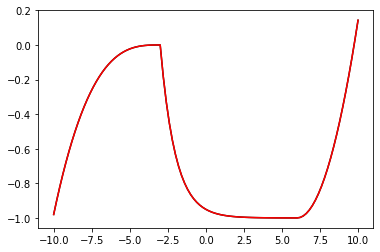

In [225]:
myfuncapprox = gmatplot @ coefs

print(np.linalg.norm(myfunc(xvec) - myfuncapprox)) # 0.18633125114381555 for Ng=101

plt.plot(xvec, myfunc(xvec), color='black')

plt.plot(xvec, myfuncapprox, color='red')
plt.show()